<a href="https://colab.research.google.com/github/Suchita2713/OCR-Language-Translation-Text-to-Speech.ipynb---Colaboratory_files/blob/main/OCR_%2B_Language_Translation_%2B_Text_to_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install googletrans


In [6]:
!pip install gTTS


In [48]:
!wget https://qph.fs.quoracdn.net/main-qimg-2e7408a6a8cc004640cd020770c3f7bd

--2022-02-04 15:01:23--  https://qph.fs.quoracdn.net/main-qimg-2e7408a6a8cc004640cd020770c3f7bd
Resolving qph.fs.quoracdn.net (qph.fs.quoracdn.net)... 151.101.1.2, 151.101.65.2, 151.101.129.2, ...
Connecting to qph.fs.quoracdn.net (qph.fs.quoracdn.net)|151.101.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33286 (33K) [image/png]
Saving to: ‘main-qimg-2e7408a6a8cc004640cd020770c3f7bd.2’

main-qimg-2e7408a6a 100%[===================>]  32.51K  --.-KB/s    in 0.003s  

2022-02-04 15:01:23 (12.5 MB/s) - ‘main-qimg-2e7408a6a8cc004640cd020770c3f7bd.2’ saved [33286/33286]



In [8]:
!pip install easyocr

In [9]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.2.52
Uninstalling opencv-python-headless-4.5.2.52:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.2.52.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-8daa01ff.so.58.109.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-06a336f2.so.58.61.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-01d48d95.so.56.60.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-098682aa.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libpng15-c2ffaf3d.so.15.13.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libssl-f3db6a3b.so.1.1
    /usr/local/lib/python3.7/dist-package

In [10]:
!pip install opencv-python-headless==4.5.2.52


  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (38.2 MB)


In [3]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [49]:
reader=easyocr.Reader(['fr'])
translator=Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


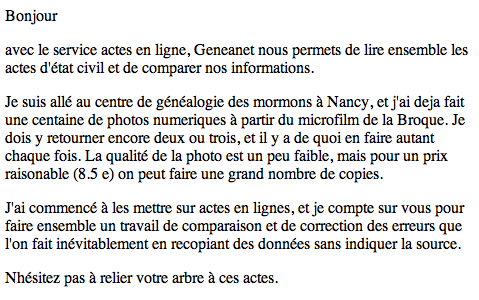

In [50]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open("main-qimg-2e7408a6a8cc004640cd020770c3f7bd")
im

In [51]:
bounds=reader.readtext("main-qimg-2e7408a6a8cc004640cd020770c3f7bd",add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='=.')
bounds

[([[0, 3], [67, 3], [67, 31], [0, 31]], 'Bonjour', 0.9390579062654273),
 ([[5, 37], [57, 37], [57, 65], [5, 65]], 'avcc lc €', 0.5095964294083026),
 ([[59, 37], [105, 37], [105, 65], [59, 65]], 'crvice 5', 0.132045038782117),
 ([[102, 40], [128, 40], [128, 64], [102, 64]], 'acte', 0.8759534358978271),
 ([[128, 36], [190, 36], [190, 68], [128, 68]],
  '; cn ligne -',
  0.3335263366985806),
 ([[187, 37], [291, 37], [291, 65], [187, 65]],
  ', Gencanct nous',
  0.9495307817657256),
 ([[294, 40], [348, 40], [348, 64], [294, 64]],
  'pcrmets (',
  0.42746481843173534),
 ([[345, 37], [471, 37], [471, 65], [345, 65]],
  'de lirc ensemblc les',
  0.44017904318863177),
 ([[6, 58], [32, 58], [32, 82], [6, 82]], 'acte', 0.8244090676307678),
 ([[33, 55], [205, 55], [205, 83], [33, 83]],
  '; ďétat civil ct dc comparcr',
  0.6631800595444792),
 ([[225, 55], [305, 55], [305, 83], [225, 83]],
  ' information',
  0.9360834975513309),
 ([[14, 86], [142, 86], [142, 118], [14, 118]],
  ' suis alé au cent

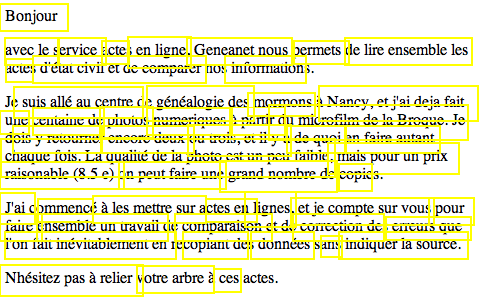

In [52]:
def draw_boxes(image,bounds,color='yellow',width=2):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color,width=width)
  return image

draw_boxes(im,bounds)



In [54]:
text_list=reader.readtext("main-qimg-2e7408a6a8cc004640cd020770c3f7bd",detail=0)
text_list

['Bonjour',
 'avec lc scrvicc actes cn ligne, Gcncanct nous pcrmets dc lirc cnscmble lcs',
 "actcs d'état civil ct dc comparcr nos informations_",
 'Je suis allé au centrc dc généalogic des mormons',
 "Nancy, ct j'ai dcja fait",
 'unc ccntainc dc photos numcriques',
 'du microfilm dc la Broquc. Je',
 'dois y rctourncr cncorc dcux ou tois , ct il y',
 'cn fairc autant',
 'chaque fois. La qualité de la photo cst un pcu faible, mais pour un prix',
 'raisonablc (8.5 c) on pcut fairc unc grand nombrc dc copics.',
 'Jai commencé à les mcttre sur actes cn lignes',
 'ct jc comptc sur vOUS pour',
 'fairc cnscmblc un travail dc comparaison ct dc corrcction dcs crrcurs quc',
 'Ton fait inévitablcmcnt cn rccopiant dcs donnécs sans indiqucr la sourcc.',
 'Nhésitez pas à rclicr vouc arbrc',
 'ccs actes',
 'partir',
 'quoi ,']

In [55]:
text_comb=' '.join(text_list)
text_comb

"Bonjour avec lc scrvicc actes cn ligne, Gcncanct nous pcrmets dc lirc cnscmble lcs actcs d'état civil ct dc comparcr nos informations_ Je suis allé au centrc dc généalogic des mormons Nancy, ct j'ai dcja fait unc ccntainc dc photos numcriques du microfilm dc la Broquc. Je dois y rctourncr cncorc dcux ou tois , ct il y cn fairc autant chaque fois. La qualité de la photo cst un pcu faible, mais pour un prix raisonablc (8.5 c) on pcut fairc unc grand nombrc dc copics. Jai commencé à les mcttre sur actes cn lignes ct jc comptc sur vOUS pour fairc cnscmblc un travail dc comparaison ct dc corrcction dcs crrcurs quc Ton fait inévitablcmcnt cn rccopiant dcs donnécs sans indiqucr la sourcc. Nhésitez pas à rclicr vouc arbrc ccs actes partir quoi ,"

In [16]:
!pip3 uninstall googletrans

Found existing installation: googletrans 3.1.0a0
Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)? y
  Successfully uninstalled googletrans-3.1.0a0


In [17]:
!pip3 install googletrans==3.1.0a0

  Using cached googletrans-3.1.0a0-py3-none-any.whl


print(translator.detect(text_comb,src='mar'))


In [19]:
text_en = translator.translate(text_comb, src ='fr')
print(text_en.text)

Hello with lc scrvicc acts cn line, Gcncanct we pcrmets dc lirc cnscmble lcs actcs of civil status ct dc compare our information_ I went to the centrc dc genealogy of the Mormons Nancy, ct I dcja made unc ccntainc dc digital photos of the microfilm dc la Broquc. I have to go back to it cncorc dcux or you, and there cn doc as much each time. The quality of the photo is a low pcu, but for a reasonable price (8.5 c) it is possible to cut a large number of dc copics. I began to put them on actions cn lines and I am counting on you to do cnscmblc work of comparison and correction of crrcurs that you inevitably do by copying data without indicating the source. Do not hesitate to rcclick your tree ccs acts from what,


In [21]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')






In [23]:
Audio('trans.mp3',autoplay=True)

In [25]:
text_hi =translator.translate(text_comb,src='ta',dest='hi')
print(text_hi.text)


बोनजोर एवीईसी एलसी स्क्रूविक एक्ट्स सीएन लिग्ने, जीएनसीएनसीटी हम पीसीआरएमेट्स डीसी एलआईआरसी सीएनएससीएमबल एलसीएस एक्टसीएस डेटैट सिविल सीटी डीसी की तुलना करें। यदि आपके पास cccorc dcux या tois नहीं है, ct और cn Fairc auton check fois. फोटो cst un pcu फ़ाइल की गुणवत्ता, लेकिन pcut फेयरक unc ग्रैंड nombrc dc कॉपिक्स पर एक prix raisonablc (8.5 c) डालें। जय mcttre sur Acts cn lignes ct jc comptc sur voUS पोयर फेयरc cnscmblc un travail dc तुलना ct dc correcrs quc ton fit Invitablcmcnt cn Rcopiant dcs sanscs sansc पर शुरू करता है। Nositez pas rliclicr vuc arbrc ccs actes part quoi,


In [27]:
ta_tts_hi=gTTS(text_hi.text,lang='hi')
ta_tts_hi.save('trans_hi.mp3')



In [29]:
Audio('trans_hi.mp3',autoplay=True)

In [31]:
text_fr=translator.translate(text_comb,src='ta',dest='fr')
print(text_fr.text)

Bonjour avec lc scrvicc actes cn ligne, Gcncanct we pcrmets dc lirc cnscmble lcs actcs détat civil ct dc compare nos information_Jeis all au centrc dc gnélogic des mons nc cc cc cc cc cc la Broquc. Si vous n'avez pas de cccorc dcux ou tois, ct et cn fairc check auto fois. La qualité de la photo cst un fichier pcu, mais pour un prix raisonablc (8.5c) sur pcut fairc unc grand nombrc dc copics. Jai commenscs on mcttre sur actes cn lignes ct jc comptc sur voUS pour fairc cnscmblc un travail dc comparaison ct dc correcrs quc ton Ton fait Invitablcmcnt cn Rcopiant dcs sanscs sansc. Nositez pas à rliclicr vouc arbrc ccs actes part quoi,


In [33]:
ta_tts_fr=gTTS(text_fr.text,lang='fr')
ta_tts_fr.save('trans_fr.mp3')